# K-Means Clustering: Analyzing Geometric Data Distributions

## Implementation Overview

This project features a custom implementation of the **K-Means clustering algorithm** built entirely from scratch. 

To ensure a deep understanding of the underlying mechanics—such as centroid initialization, distance computation, and iterative refinement—the implementation relies exclusively on the **NumPy** package for vectorized operations, without the use of high-level machine learning libraries for the core logic.

### **1. Useful packages**

In [15]:
import matplotlib.pyplot as plt
import numpy as np

### **2. Data**

### **2.1 Convex Data**

Generating Convex Data

In [16]:
# Generating 2D convex data
X_convex = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffling the data
np.random.shuffle(X_convex)

print(X_convex.shape)

(2000, 2)


Visualizing the Dataset

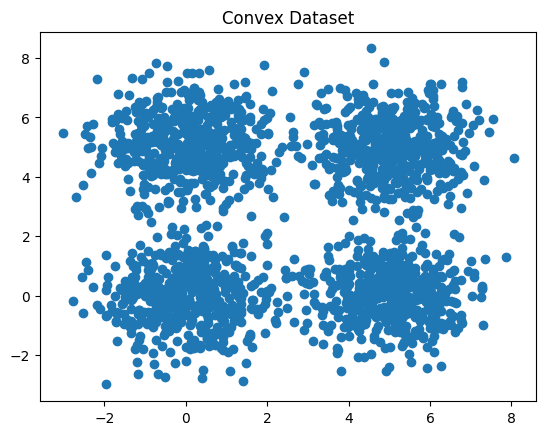

In [17]:
# Visualizing the convex 2D dataset to explore the clusters
plt.title("Convex Dataset")
plt.scatter(X_convex[:, 0], X_convex[:, 1])

### **2.2 Non-Convex Data**

Generating Non-Convex Data

In [18]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X_non_convex, y = make_moons(n_samples=300, noise=0.05, random_state=42)

Visualizing the Dataset

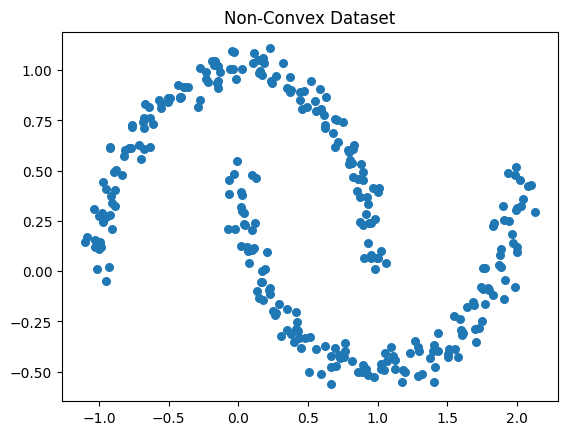

In [19]:
plt.scatter(X_non_convex[:, 0], X_non_convex[:, 1], s=30)
plt.title("Non-Convex Dataset")
plt.show()

### **3. K-Means**

Implementing K-Means from Scratch

In [20]:
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
        # Data storage
        self.X_fit_ = None
        self.labels_ = None
        self.centroids = None
        
        # History tracking for analysis
        self.labels_history = []
        self.centroids_history = []
        self.costs = []

    def fit(self, X):
        """Fits the K-Means model to the dataset X."""
        self.X_fit_ = X
        self.n_samples, self.n_features = X.shape

        # Initializing centroids by randomly selecting points from X
        indices = np.random.choice(self.n_samples, size=self.n_clusters, replace=False)
        self.centroids_history.append(X[indices].copy())
        
        # Initial tracking before iterations
        initial_labels = self._get_labels(X)
        self.costs.append(self._calculate_cost(X))

        for i in range(self.max_iter):
            # 1. Assign labels based on current centroids
            labels = self._get_labels(X)
            self.labels_history.append(labels.copy())
            
            # 2. Update centroids based on cluster mean
            curr_centroids = self._get_centroids(X, labels)
            self.centroids_history.append(curr_centroids.copy())
            
            # 3. Calculate cost (Inertia)
            self.costs.append(self._calculate_cost(X))
            
            # 4. Check for convergence (if labels stopped changing)
            if self._is_converged():
                break
                
        self.labels_ = labels
        self.centroids = curr_centroids
        return self

    def predict(self, X):
        """Predicts the closest cluster for each sample in X."""
        distances = self._compute_distances(X, self.centroids)
        return np.argmin(distances, axis=1)

    def _get_distances(self, X):
        """Helper to get distances from points to the latest centroids in history."""
        return self._compute_distances(X, self.centroids_history[-1])

    def _compute_distances(self, X, centroids):
        """Computes Euclidean distance between X and given centroids."""
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i in range(self.n_clusters):
            distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)
        return distances

    def _get_labels(self, X):
        """Assigns points to the nearest centroid."""
        distances = self._get_distances(X)
        return np.argmin(distances, axis=1)

    def _get_centroids(self, X, labels):
        """Calculates new centroids as the mean of each cluster's points."""
        new_centroids = np.zeros((self.n_clusters, self.n_features))
        for i in range(self.n_clusters):
            if np.any(labels == i): # Handle potential empty clusters
                new_centroids[i] = np.mean(X[labels == i], axis=0)
        return new_centroids

    def _is_converged(self):
        """Checks if the labels changed between the last two iterations."""
        if len(self.labels_history) < 2:
            return False
        return np.array_equal(self.labels_history[-1], self.labels_history[-2])

    def _calculate_cost(self, X):
        """Calculates the Sum of Squared Errors (SSE)."""
        distances = self._get_distances(X)
        labels = self._get_labels(X)
        # For each point, take the squared distance to its assigned centroid
        return np.sum(np.square(distances[np.arange(self.n_samples), labels]))

### **3.1 K-Means Using Convex Data**

Running K-Means on Convex Data

In [21]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_convex)

Cost vs. Iterations

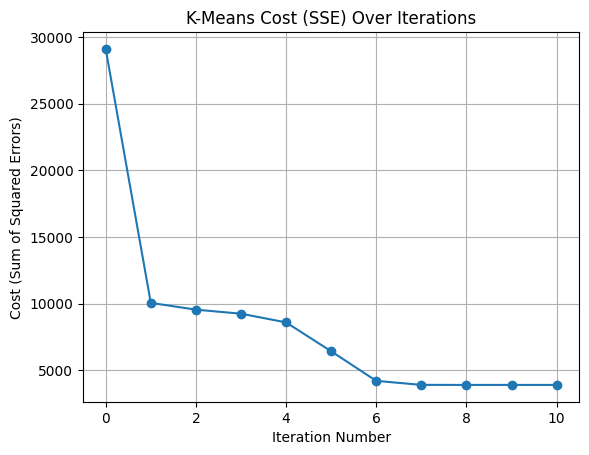

In [22]:
# Plotting the cost function (Inertia) over iterations
costs = kmeans.costs
plt.plot(costs, marker='o')
plt.title("K-Means Cost (SSE) Over Iterations")
plt.xlabel("Iteration Number")
plt.ylabel("Cost (Sum of Squared Errors)")
plt.grid(True)
plt.show()

### The Elbow Method: Finding the Optimal K
To determine the most suitable number of clusters ($K$) for our dataset, we use the **Elbow Method**. 

We run the algorithm with different values of $K$ and track the final cost (Sum of Squared Errors) for each. By plotting these costs, we look for the "elbow" point—the point where the rate of decrease shifts from sharp to gradual. This point typically indicates the natural number of clusters present in the data, balancing model complexity with accuracy.

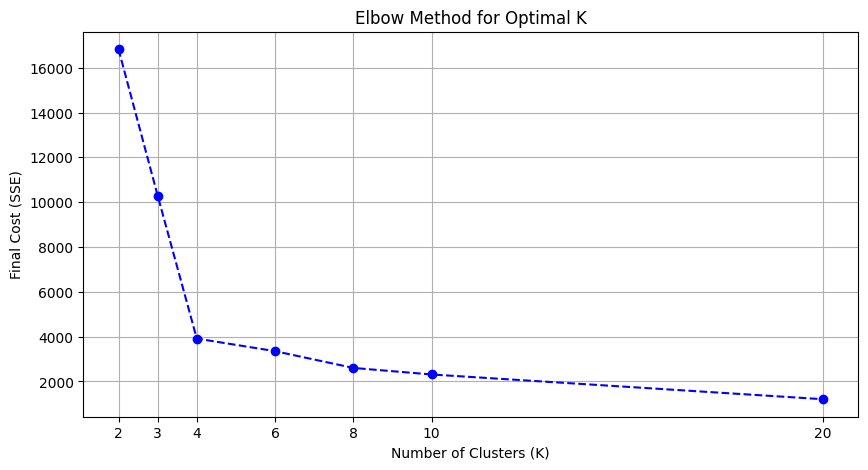

In [23]:
cluster_counts = [2, 3, 4, 6, 8, 10, 20]
final_costs = []

# Running experiments for different K values
for k in cluster_counts:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_convex)
    final_costs.append(kmeans.costs[-1])

# Plotting the results to find the "Elbow"
plt.figure(figsize=(10, 5))
plt.plot(cluster_counts, final_costs, marker='o', linestyle='--', color='b')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Final Cost (SSE)")
plt.xticks(cluster_counts)
plt.grid(True)
plt.show()

### Tracking Centroids: Step-by-Step Evolution

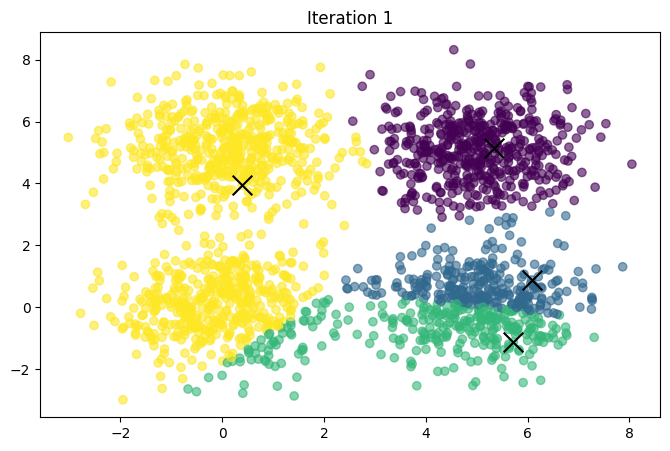

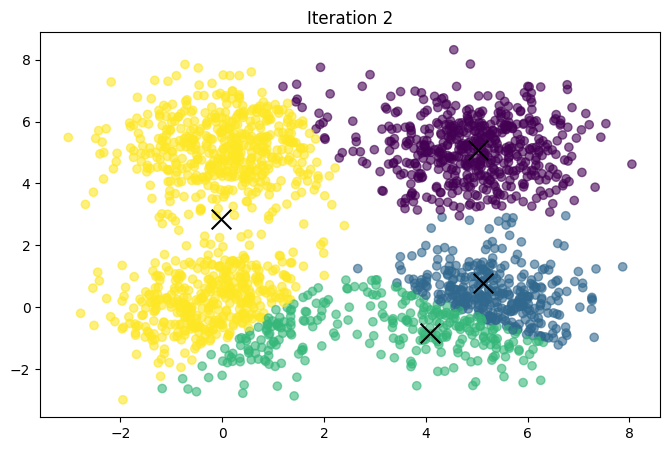

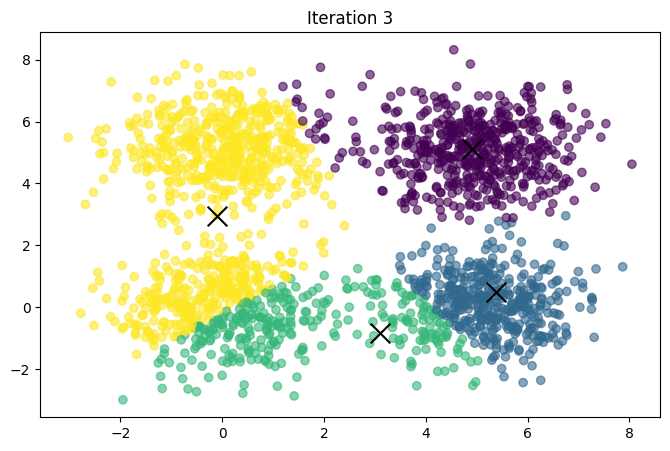

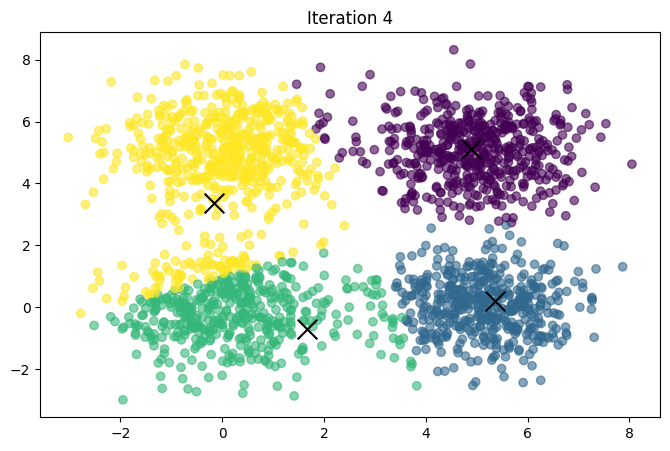

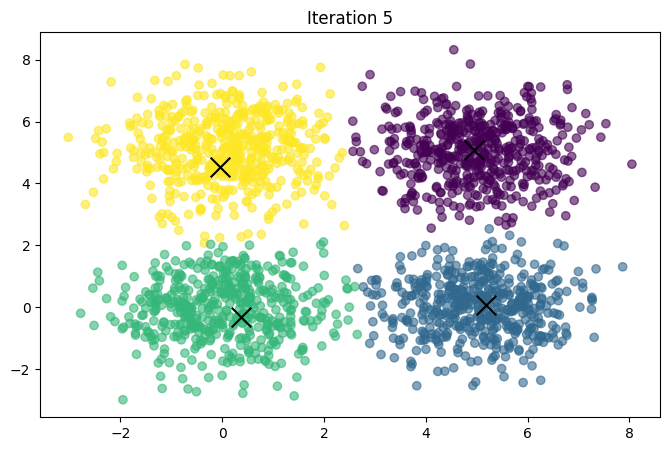

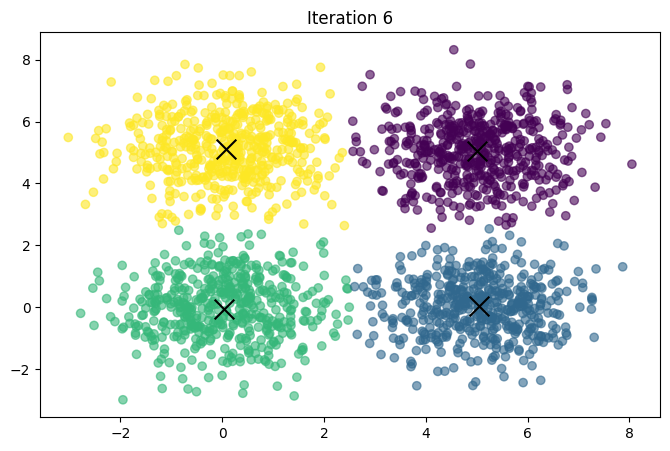

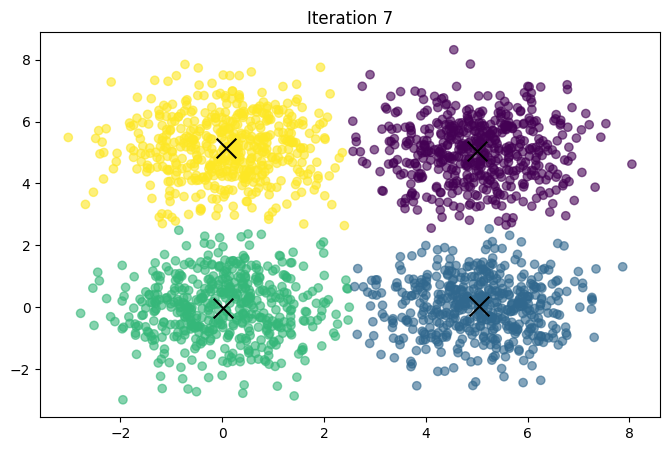

In [24]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_convex)

# Visualize the algorithm's progress step-by-step
n_iterations = len(kmeans.labels_history)

for i in range(n_iterations):
    plt.figure(figsize=(8, 5))
    
    # Get history for current iteration
    centroids = kmeans.centroids_history[i]
    labels = kmeans.labels_history[i]
    
    # Plot data points and current centroids
    plt.scatter(X_convex[:, 0], X_convex[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=200)
    
    plt.title(f"Iteration {i+1}")
    plt.show()

### **3.2 K-Means Using Non-Convex Data**

Running K-Means on Non-Convex Data (Moons)

In [25]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_non_convex)

Cost vs. Iterations (Non-Convex Data)

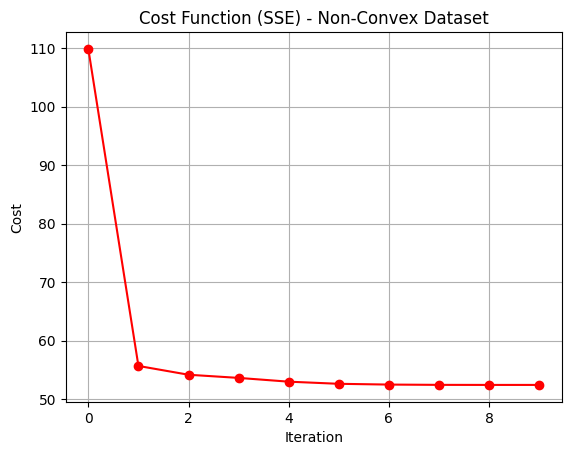

In [26]:
# Plotting the cost function over iterations
costs = kmeans.costs
plt.plot(costs, marker='o', color='red')
plt.title("Cost Function (SSE) - Non-Convex Dataset")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

### Tracking Centroids: Step-by-Step Evolution

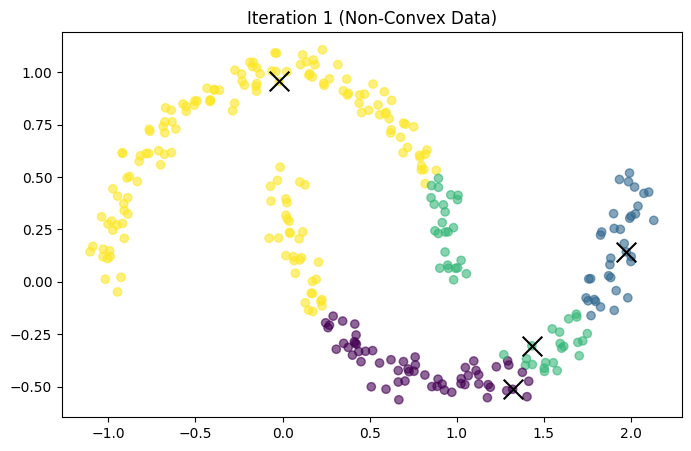

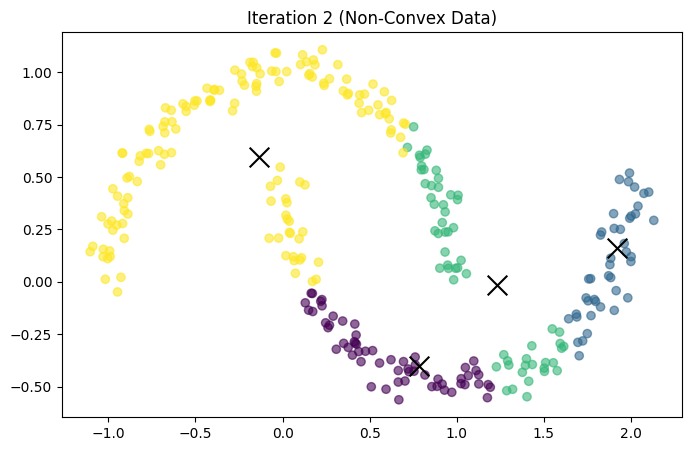

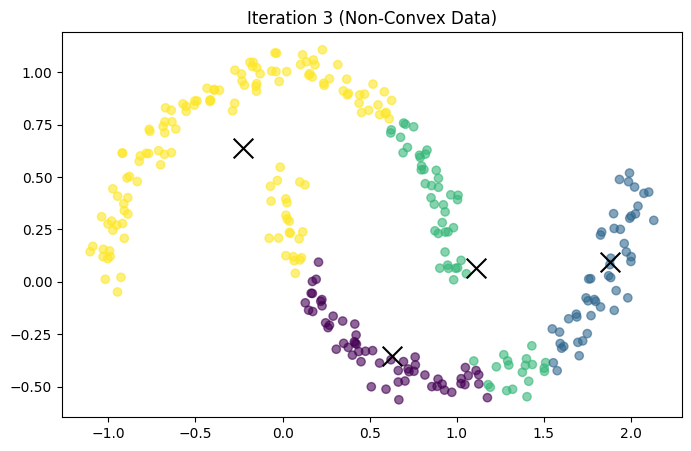

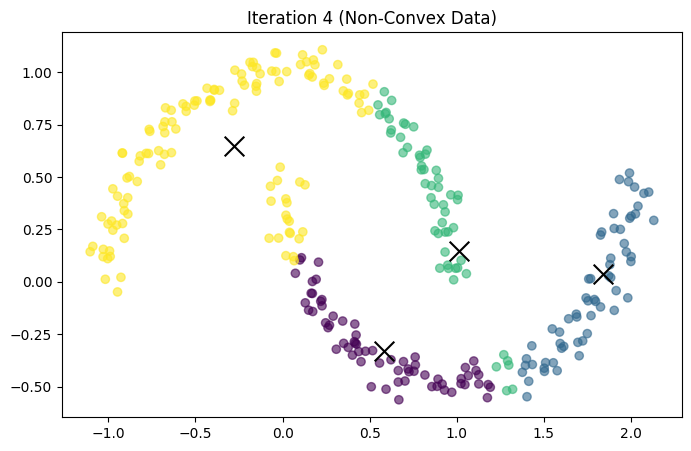

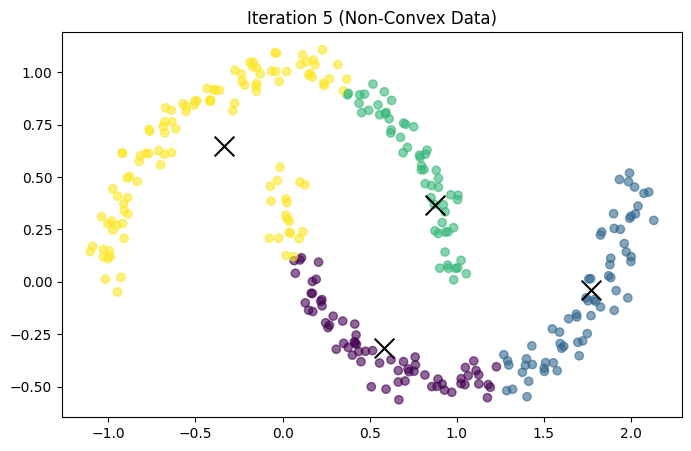

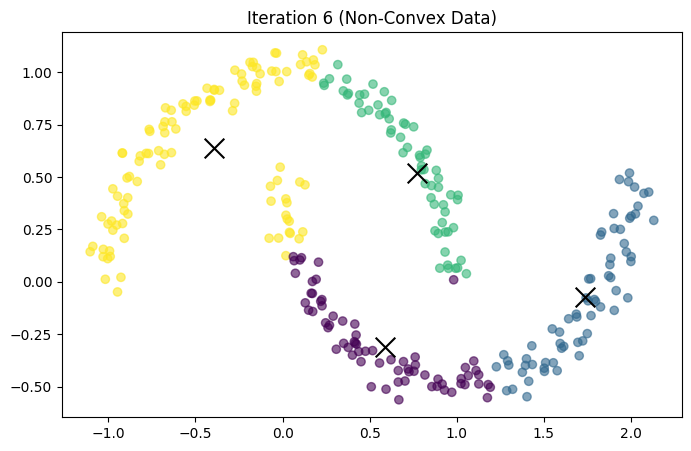

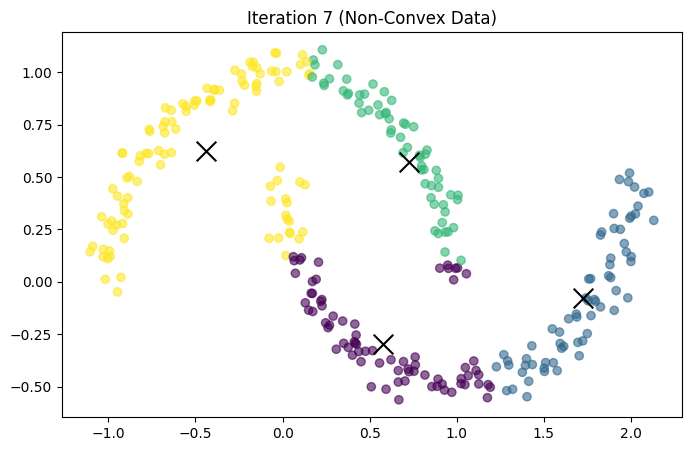

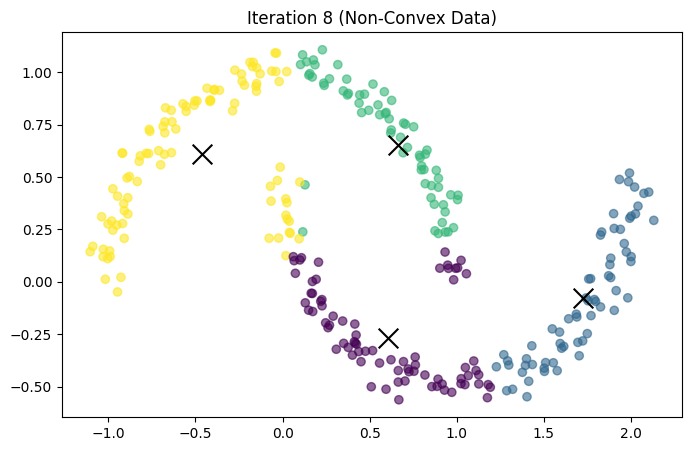

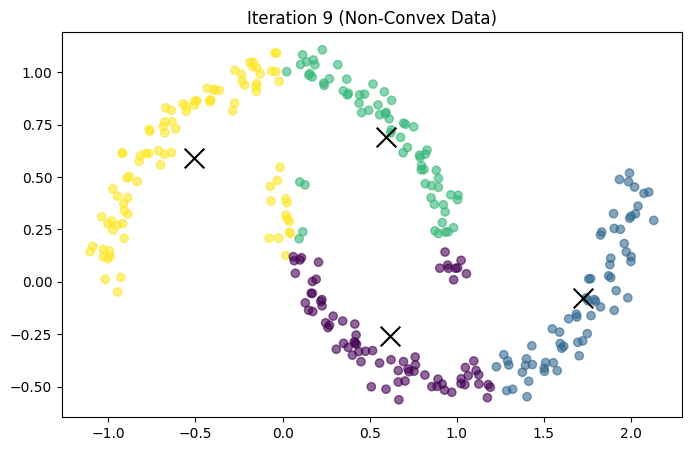

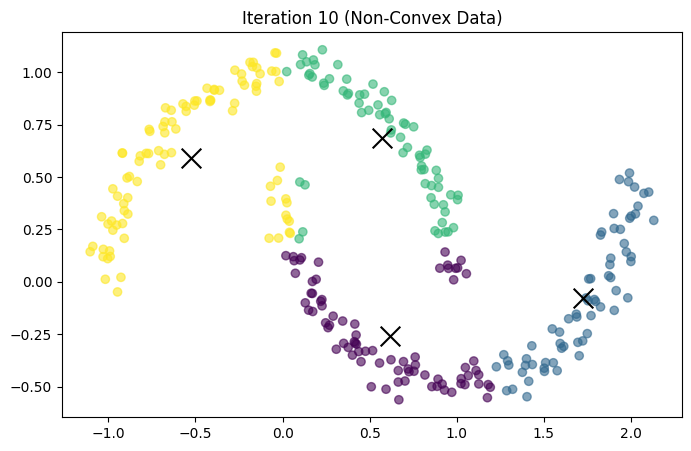

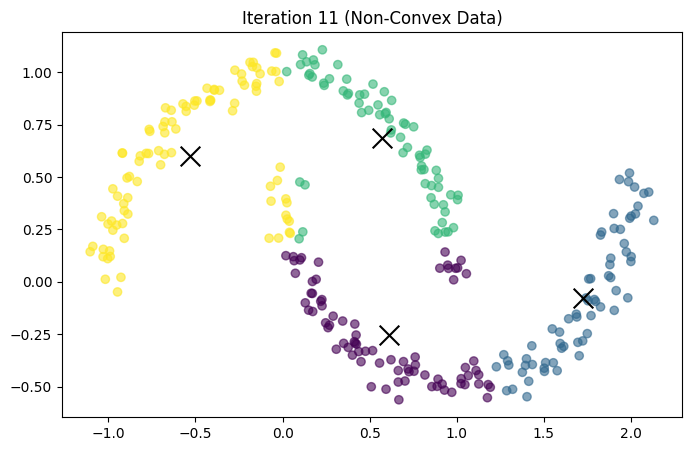

In [27]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_non_convex)

# Visualize the progress on non-convex data
n_iterations = len(kmeans.labels_history)

for i in range(n_iterations):
    plt.figure(figsize=(8, 5))
    
    # Get history for current iteration
    centroids = kmeans.centroids_history[i]
    labels = kmeans.labels_history[i]
    
    # Plot points colored by cluster and current centroids
    plt.scatter(X_non_convex[:, 0], X_non_convex[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=200)
    
    plt.title(f"Iteration {i+1} (Non-Convex Data)")
    plt.show()

### Analysis of K-Means Performance: Convex vs. Non-Convex

The performance of the K-Means algorithm varies significantly depending on the geometric structure of the data. Below is a detailed analysis of our results:

#### 1. Convex Dataset: Successful Classification
In the first experiment, K-Means successfully identifies the underlying clusters. 
* **Observation:** As seen in the graphs, all data points originating from the same distribution are assigned the same color. The centroids settle perfectly in the center of each "blob."
* **Why it works:** The data is **Linearly Separable**, and the clusters are compact and spherical. K-Means operates by creating Voronoi partitions (linear boundaries) between centroids, which is the mathematically ideal approach for this type of geometry.



#### 2. Non-Convex Dataset: Limitation and Failure
On the moon-shaped dataset, the algorithm fails to capture the natural structure of the clusters.
* **Observation:** Instead of identifying the two distinct moons, the algorithm splits them vertically or horizontally. This results in points from the same distribution being assigned different colors/labels.
* **Why it fails:** This experiment demonstrates one of the **primary limitations** of K-Means. The algorithm assumes clusters are convex and isotropic. Because it assigns labels based on the shortest Euclidean distance to a centroid, it can only generate straight-line boundaries. It cannot "bend" its decision surface to follow the curved, non-linear shapes of the moons.